# 1) Initial import and cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('C:\\Users\\alber\\Desktop\\Isdi\\Tripulación_excel.xlsx', sheet_name='Tabla_Tripulación(2)')


In [3]:
#View of data
df.head()

,Number,Name,Rank,Crew_Roles,Rango3,Country_of_Origin,Exact Origin,Destino,Causes_of_Death,Causas_de_muerte,Died?,Destination_of_the_Crew,Destionation_of_those_who_returned,Fecha,Expedition_Abandonment_Date,Ship,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1.0,Fernando de Magallanes,Capitán General,High-Ranking Officers,Oficiales de Alto Rango,Portugal,Oporto (Portugal),"† Mactán, Filipinas, en combate.",Killed by Natives,Muerto por los indios,Yes,Deceased,Deceased,27/04/1521,27/04/1521,Nao Trinidad,NaN,Muerto por los indios,Killed by Natives
1,2.0,Esteban Gómez,Piloto de Su Alteza,High-Ranking Officers,Oficiales de Alto Rango,Portugal,Oporto (Portugal),Regresó a España en la nao San Antonio. Se le ...,NaN,NaN,No,Abandoned expedition and returned to Spain,Abandoned expedition early on,S. Antonio,01/10/1520,Nao Trinidad,NaN,Portugueses,Killed by the Portuguese
2,3.0,León de Espeleta,Escribano,High-Ranking Officers,Oficiales de Alto Rango,France,"Espeleta, o Espelette (Francia)",† Muerto por los indios en la emboscada de Cebú.,Killed by Natives,Muerto por los indios,Yes,Deceased,Deceased,1/05/1521,01/05/1521,Nao Trinidad,NaN,Enfermedad,Illness/Starvation
3,4.0,Juan Bautista de Punzorol,Maestre,High-Ranking Officers,Oficiales de Alto Rango,Italy,"La población que figura es Cestre, que no exis...",† Intentó la vuelta con la Trinidad por el Pac...,Killed by Portuguese Sailors,Portugueses,Yes,Deceased,Deceased,año 1526,06/04/1522,Nao Trinidad,NaN,Otros,Other fatal incidents
4,5.0,Gonzalo Gómez de Espinosa,Alguacil Mayor,Navigation Officers,Oficiales de Navegación y Logística,Spain,Espinosa de Los Monteros (Burgos),Uno de los cuatro supervivientes de la Trinida...,NaN,NaN,No,Abandoned expedition and returned to Spain,Returned to Spain later on,Superviviente Trinidad,06/04/1522,Nao Trinidad,NaN,NaN,NaN


In [4]:
#Cheking the columns
df.columns

Index(['Number', 'Name', 'Rank', 'Crew_Roles', 'Rango3', 'Country_of_Origin',
       'Exact Origin', 'Destino', 'Causes_of_Death', 'Causas_de_muerte',
       'Died?', 'Destination_of_the_Crew',
       'Destionation_of_those_who_returned', 'Fecha',
       'Expedition_Abandonment_Date', 'Ship', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18'],
      dtype='object')

In [5]:
# Listing the only columns I want the dataframe to contain and omit the other ones
selected_columns = [
    'Crew_Roles',
    'Country_of_Origin',
    'Causes_of_Death',
    'Died?',
    'Destination_of_the_Crew',
    'Expedition_Abandonment_Date',
    'Ship'
]

df = df[selected_columns]

In [6]:
# Getting rid of all the entries below 247 since they are NAN
df = df.loc[0:246]
df

,Crew_Roles,Country_of_Origin,Causes_of_Death,Died?,Destination_of_the_Crew,Expedition_Abandonment_Date,Ship
0,High-Ranking Officers,Portugal,Killed by Natives,Yes,Deceased,27/04/1521,Nao Trinidad
1,High-Ranking Officers,Portugal,NaN,No,Abandoned expedition and returned to Spain,01/10/1520,Nao Trinidad
2,High-Ranking Officers,France,Killed by Natives,Yes,Deceased,01/05/1521,Nao Trinidad
3,High-Ranking Officers,Italy,Killed by Portuguese Sailors,Yes,Deceased,06/04/1522,Nao Trinidad
4,Navigation Officers,Spain,NaN,No,Abandoned expedition and returned to Spain,06/04/1522,Nao Trinidad
...,...,...,...,...,...,...,...
242,Servants/Attendants,Spain,Illness/Starvation,Yes,Deceased,10/04/1521,Nao Santiago
243,Distinguished Members,Spain,Illness/Starvation,Yes,Deceased,09/04/1521,Nao Santiago
244,Distinguished Members,Spain,Illness/Starvation,Yes,Deceased,06/04/1522,Nao Santiago
245,Distinguished Members,Spain,NaN,No,Abandoned expedition and returned to Spain,09/07/1522,Nao Santiago


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Crew_Roles                   247 non-null    object
 1   Country_of_Origin            247 non-null    object
 2   Causes_of_Death              139 non-null    object
 3   Died?                        247 non-null    object
 4   Destination_of_the_Crew      247 non-null    object
 5   Expedition_Abandonment_Date  247 non-null    object
 6   Ship                         247 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


In [8]:
df['Ship'].value_counts()

Nao Trinidad       64
Nao San Antonio    58
Nao Victoria       46
Nao Concepción     45
Nao Santiago       34
Name: Ship, dtype: int64

In [9]:
# Getting rid of those columns that are too linked to the 'Died?' variable and only 
# using those that don't give away any clues of wether they died or not

selected_columns_1 = [
    'Crew_Roles',
    'Country_of_Origin',
    'Ship',
    'Died?'
]

df = df[selected_columns_1]
df

,Crew_Roles,Country_of_Origin,Ship,Died?
0,High-Ranking Officers,Portugal,Nao Trinidad,Yes
1,High-Ranking Officers,Portugal,Nao Trinidad,No
2,High-Ranking Officers,France,Nao Trinidad,Yes
3,High-Ranking Officers,Italy,Nao Trinidad,Yes
4,Navigation Officers,Spain,Nao Trinidad,No
...,...,...,...,...
242,Servants/Attendants,Spain,Nao Santiago,Yes
243,Distinguished Members,Spain,Nao Santiago,Yes
244,Distinguished Members,Spain,Nao Santiago,Yes
245,Distinguished Members,Spain,Nao Santiago,No


In [10]:
df['Died?'].value_counts()

Yes    139
No     108
Name: Died?, dtype: int64

# 2) Encoding Categorical Variables

In [11]:
# Convert 'Died?' to binary (0 for 'No' and 1 for 'Yes')

df.loc[:, 'Died?'] = df['Died?'].map({'No': 0, 'Yes': 1})
df

C:\Users\alber\AppData\Local\Temp\ipykernel_5428\1574896499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Died?'] = df['Died?'].map({'No': 0, 'Yes': 1})
C:\Users\alber\AppData\Local\Temp\ipykernel_5428\1574896499.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Died?'] = df['Died?'].map({'No': 0, 'Yes': 1})


,Crew_Roles,Country_of_Origin,Ship,Died?
0,High-Ranking Officers,Portugal,Nao Trinidad,1
1,High-Ranking Officers,Portugal,Nao Trinidad,0
2,High-Ranking Officers,France,Nao Trinidad,1
3,High-Ranking Officers,Italy,Nao Trinidad,1
4,Navigation Officers,Spain,Nao Trinidad,0
...,...,...,...,...
242,Servants/Attendants,Spain,Nao Santiago,1
243,Distinguished Members,Spain,Nao Santiago,1
244,Distinguished Members,Spain,Nao Santiago,1
245,Distinguished Members,Spain,Nao Santiago,0


In [12]:
df.head()

,Crew_Roles,Country_of_Origin,Ship,Died?
0,High-Ranking Officers,Portugal,Nao Trinidad,1
1,High-Ranking Officers,Portugal,Nao Trinidad,0
2,High-Ranking Officers,France,Nao Trinidad,1
3,High-Ranking Officers,Italy,Nao Trinidad,1
4,Navigation Officers,Spain,Nao Trinidad,0


In [13]:
# First let's investigate wethere there are missing values. 
# If there were, we should do something about them. It's not the case.
df.isnull().count()

Crew_Roles           247
Country_of_Origin    247
Ship                 247
Died?                247
dtype: int64

In [14]:
# Apply one-hot encoding to categorical variables, convert categories into numbers
df_encoded = pd.get_dummies(df, columns=['Crew_Roles', 'Country_of_Origin', 'Ship'])
df_encoded

,Died?,Crew_Roles_ Sailors,Crew_Roles_Distinguished Members,Crew_Roles_High-Ranking Officers,Crew_Roles_Navigation Officers,Crew_Roles_Novice Crew,Crew_Roles_Others,Crew_Roles_Servants/Attendants,Crew_Roles_Support Staff,Country_of_Origin_Belgium,...,Country_of_Origin_Malaysia,Country_of_Origin_Portugal,Country_of_Origin_Spain,Country_of_Origin_Unknown,Country_of_Origin_unknown,Ship_Nao Concepción,Ship_Nao San Antonio,Ship_Nao Santiago,Ship_Nao Trinidad,Ship_Nao Victoria
0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
243,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
244,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
245,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [15]:
# Let us see the result of the encoding
df_encoded.columns

Index(['Died?', 'Crew_Roles_ Sailors', 'Crew_Roles_Distinguished Members',
       'Crew_Roles_High-Ranking Officers', 'Crew_Roles_Navigation Officers',
       'Crew_Roles_Novice Crew', 'Crew_Roles_Others',
       'Crew_Roles_Servants/Attendants', 'Crew_Roles_Support Staff',
       'Country_of_Origin_Belgium', 'Country_of_Origin_England',
       'Country_of_Origin_France', 'Country_of_Origin_Germany',
       'Country_of_Origin_Greece', 'Country_of_Origin_Ireland',
       'Country_of_Origin_Italy', 'Country_of_Origin_Malaysia',
       'Country_of_Origin_Portugal', 'Country_of_Origin_Spain',
       'Country_of_Origin_Unknown', 'Country_of_Origin_unknown',
       'Ship_Nao Concepción', 'Ship_Nao San Antonio', 'Ship_Nao Santiago',
       'Ship_Nao Trinidad', 'Ship_Nao Victoria'],
      dtype='object')

# 3) Splitting Data into Training and Testing Sets

In [16]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = df_encoded.drop(columns=['Died?'])  # Features
y = df_encoded['Died?']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, y_train (for training) and X_test, y_test (for testing)


# 4) Using Logistic Regresion as our Machine Learning Model

In [17]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [18]:
# Print the coefficients and intercept
print("Coefficients:", logistic_model.coef_)
print("Intercept:", logistic_model.intercept_)

Coefficients: [[-3.67225826e-01  4.23265286e-01  3.01031499e-01 -6.47243877e-01
   3.62310070e-02  1.53902478e-01  1.01376209e-01 -1.12404422e-03
  -4.11269751e-01  2.56851415e-01  5.59796984e-01  1.19513583e-01
  -1.24163489e+00  2.84683247e-01 -1.13515203e-02 -5.50706984e-01
   4.43258532e-01  2.74864946e-03  5.29415274e-02  4.95381938e-01
   4.02530011e-01 -1.11520554e+00  3.75936049e-01  4.54834684e-01
  -1.17882473e-01]]
Intercept: [0.19791935]


# 5) Evaluating the model

In [19]:
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Predict on the testing data
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.68

In [21]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
classification_rep


'              precision    recall  f1-score   support\n\n           0       0.60      0.47      0.53        19\n           1       0.71      0.81      0.76        31\n\n    accuracy                           0.68        50\n   macro avg       0.66      0.64      0.64        50\nweighted avg       0.67      0.68      0.67        50\n'

In [22]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.47      0.53        19
           1       0.71      0.81      0.76        31

    accuracy                           0.68        50
   macro avg       0.66      0.64      0.64        50
weighted avg       0.67      0.68      0.67        50



# 6) Checking what variables were more influential

In [23]:
# Get the coefficients and feature names
coefficients = logistic_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients
print(coefficients_df)

                             Feature  Coefficient  Abs_Coefficient
12          Country_of_Origin_Greece    -1.241635         1.241635
21              Ship_Nao San Antonio    -1.115206         1.115206
3     Crew_Roles_Navigation Officers    -0.647244         0.647244
10          Country_of_Origin_France     0.559797         0.559797
15        Country_of_Origin_Malaysia    -0.550707         0.550707
19         Country_of_Origin_unknown     0.495382         0.495382
23                 Ship_Nao Trinidad     0.454835         0.454835
16        Country_of_Origin_Portugal     0.443259         0.443259
1   Crew_Roles_Distinguished Members     0.423265         0.423265
8          Country_of_Origin_Belgium    -0.411270         0.411270
20               Ship_Nao Concepción     0.402530         0.402530
22                 Ship_Nao Santiago     0.375936         0.375936
0                Crew_Roles_ Sailors    -0.367226         0.367226
2   Crew_Roles_High-Ranking Officers     0.301031         0.30

In [24]:
coefficients_df.drop(columns='Abs_Coefficient',inplace=True)

In [25]:
coefficients_df

,Feature,Coefficient
12,Country_of_Origin_Greece,-1.241635
21,Ship_Nao San Antonio,-1.115206
3,Crew_Roles_Navigation Officers,-0.647244
10,Country_of_Origin_France,0.559797
15,Country_of_Origin_Malaysia,-0.550707
19,Country_of_Origin_unknown,0.495382
23,Ship_Nao Trinidad,0.454835
16,Country_of_Origin_Portugal,0.443259
1,Crew_Roles_Distinguished Members,0.423265
8,Country_of_Origin_Belgium,-0.411270


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the coefficients by ascending order (negative to positive)
coefficients_df = coefficients_df.sort_values(by='Coefficient')
coefficients_df

,Feature,Coefficient
12,Country_of_Origin_Greece,-1.241635
21,Ship_Nao San Antonio,-1.115206
3,Crew_Roles_Navigation Officers,-0.647244
15,Country_of_Origin_Malaysia,-0.550707
8,Country_of_Origin_Belgium,-0.411270
0,Crew_Roles_ Sailors,-0.367226
24,Ship_Nao Victoria,-0.117882
14,Country_of_Origin_Italy,-0.011352
7,Crew_Roles_Support Staff,-0.001124
17,Country_of_Origin_Spain,0.002749


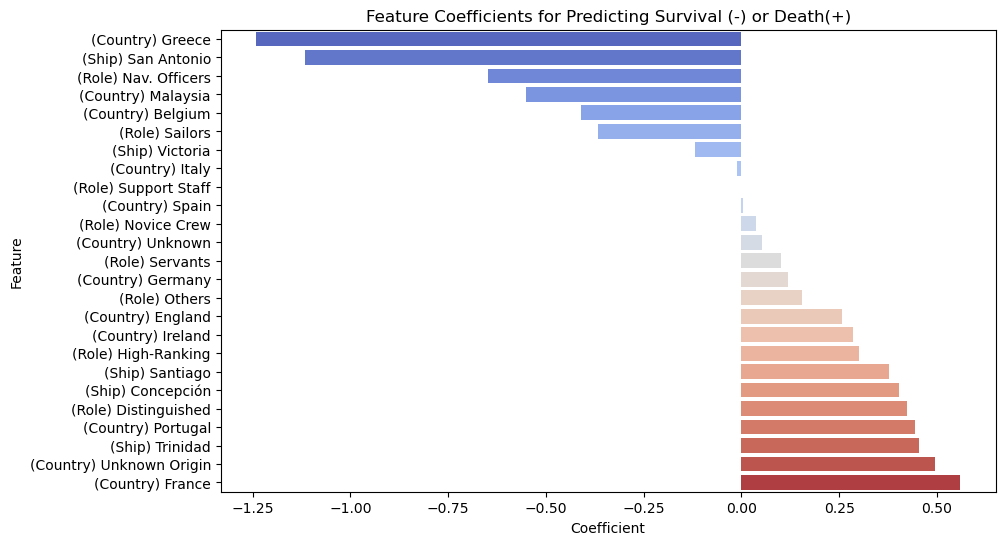

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define cleaner feature names
clean_feature_names = {
    'Country_of_Origin_Greece': '(Country) Greece',
    'Ship_Nao San Antonio': '(Ship) San Antonio',
    'Crew_Roles_Navigation Officers': '(Role) Nav. Officers',
    'Country_of_Origin_France': '(Country) France',
    'Country_of_Origin_Malaysia': '(Country) Malaysia',
    'Country_of_Origin_unknown': '(Country) Unknown Origin',
    'Ship_Nao Trinidad': '(Ship) Trinidad',
    'Country_of_Origin_Portugal': '(Country) Portugal',
    'Crew_Roles_Distinguished Members': '(Role) Distinguished',
    'Country_of_Origin_Belgium': '(Country) Belgium',
    'Ship_Nao Concepción': '(Ship) Concepción',
    'Ship_Nao Santiago': '(Ship) Santiago',
    'Crew_Roles_ Sailors': '(Role) Sailors',
    'Crew_Roles_High-Ranking Officers': '(Role) High-Ranking',
    'Country_of_Origin_Ireland': '(Country) Ireland',
    'Country_of_Origin_England': '(Country) England',
    'Crew_Roles_Others': '(Role) Others',
    'Country_of_Origin_Germany': '(Country) Germany',
    'Ship_Nao Victoria': '(Ship) Victoria',
    'Crew_Roles_Servants/Attendants': '(Role) Servants',
    'Country_of_Origin_Unknown': '(Country) Unknown',
    'Crew_Roles_Novice Crew': '(Role) Novice Crew',
    'Country_of_Origin_Italy': '(Country) Italy',
    'Country_of_Origin_Spain': '(Country) Spain',
    'Crew_Roles_Support Staff': '(Role) Support Staff'
}

# Apply cleaner feature names to the DataFrame
coefficients_df['Feature'] = coefficients_df['Feature'].map(clean_feature_names)

# Sort the coefficients by ascending order (negative to positive)
coefficients_df = coefficients_df.sort_values(by='Coefficient')

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')

# Set plot labels and title
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients for Predicting Survival (-) or Death(+)')

# Display the plot
plt.show()